# Capstone- Cyclistic Bikeshare

Context: 

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Maximizing the number of annual members will be key to future growth. 

The goal for the analysis is to find out the behaviour difference between the annual members and casual riders and provide recommendations for Cyclistic marketing strategies aimed at converting casual riders into annual members. More details are in the read me file. 

# Step 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. Concate the 12 months tripdata

import the 12 months data

In [2]:
raw_tripdata_1= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202104-divvy-tripdata.csv")
raw_tripdata_2= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202105-divvy-tripdata.csv")
raw_tripdata_3= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202106-divvy-tripdata.csv")
raw_tripdata_4= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202107-divvy-tripdata.csv")
raw_tripdata_5= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202108-divvy-tripdata.csv")
raw_tripdata_6= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202109-divvy-tripdata.csv")
raw_tripdata_7= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202110-divvy-tripdata.csv")
raw_tripdata_8= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202111-divvy-tripdata.csv")
raw_tripdata_9= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202112-divvy-tripdata.csv")
raw_tripdata_10= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202201-divvy-tripdata.csv")
raw_tripdata_11= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202202-divvy-tripdata.csv")
raw_tripdata_12= pd.read_csv(r"C:\Users\shuqi\OneDrive\Desktop\Training\Google Data Analytics training\Case Study\202004-202203-divvy-tripdata\202203-divvy-tripdata.csv")

setup the table 'raw_tripdata_yearly', to include the annual bikeshare data

In [3]:
raw_tripdata_yearly = pd.concat([raw_tripdata_1, raw_tripdata_2, raw_tripdata_3,raw_tripdata_4,raw_tripdata_5,raw_tripdata_6,raw_tripdata_7,raw_tripdata_8,raw_tripdata_9,raw_tripdata_10,raw_tripdata_11,raw_tripdata_12])

make a copy of the original data, save it as 'tripdata_yearly'. Work on this dataset to keep the original data available 

In [4]:
tripdata_yearly= raw_tripdata_yearly.copy()

In [5]:
tripdata_yearly

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284037,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual
284038,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual
284039,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member
284040,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member


## 2. Remove duplicates 

remove duplicates, using 'ride_id' as searching index

In [6]:
df_trip= tripdata_yearly.drop_duplicates('ride_id')

In [7]:
df_trip

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284037,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual
284038,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual
284039,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member
284040,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member


Drop Duplicates 

In [8]:
# set the key and look for data record is over 1( has duplication). fill na with -999 
key = ['started_at', 'ended_at', 'start_station_id', 'end_station_id','member_casual']
df_trip.fillna(-999).groupby(key)['member_casual'].count().sort_values(ascending=False).head(20)

started_at           ended_at             start_station_id  end_station_id  member_casual
2021-08-28 21:16:47  2021-08-28 21:30:55  13059             TA1308000049    member           3
2021-09-06 18:47:11  2021-09-06 18:59:29  TA1309000019      TA1308000049    casual           2
2021-08-04 19:19:52  2021-08-04 20:07:08  13235             13319           casual           2
2021-07-04 22:59:21  2021-07-04 23:32:51  LP-               13430           casual           2
2021-05-01 19:52:19  2021-05-01 20:02:32  TA1307000136      TA1307000136    member           2
2021-07-29 22:32:39  2021-07-29 22:40:46  KA1706005007      TA1309000001    casual           2
2021-11-14 21:13:04  2021-11-14 21:18:14  13216             13217           member           2
2021-08-01 22:34:42  2021-08-01 22:48:50  SL-011            13033           casual           2
2021-09-01 17:42:29  2021-09-01 18:10:27  13191             KA1503000012    casual           2
2021-06-05 15:16:25  2021-06-05 15:41:30  TA1307000041 

In [9]:
# drop duplicates based on the key.

key = ['started_at', 'ended_at', 'start_station_id', 'end_station_id','member_casual']
df_trip_dedupped = df_trip.drop_duplicates(subset=key)

print(df_trip.shape)
print(df_trip_dedupped.shape)

(5723532, 13)
(5722959, 13)


## 3. Drop unneccessary column - 'ride_id', 'start_station_name' & 'end_station_name'

'ride_id' doesn't provide valuable information. Station ID and station name are reptitve info. Keep Station ID for analysis 

In [10]:
df_trip_dedupped =df_trip_dedupped.drop(['ride_id','start_station_name','end_station_name'],axis=1)

In [11]:
df_trip_dedupped.head(2)

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,TA1307000061,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,KA1503000069,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual


## 4. Dealing with missing data and null

In [12]:
# it's a large dataset.Using the statistics to help with observing the data- % of missing.
for col in df_trip_dedupped.columns:
    pct_missing = np.mean(df_trip_dedupped[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

rideable_type - 0%
started_at - 0%
ended_at - 0%
start_station_id - 13%
end_station_id - 14%
start_lat - 0%
start_lng - 0%
end_lat - 0%
end_lng - 0%
member_casual - 0%


In [13]:
# fill the na with '_MISSING_'
df_trip_dedupped['start_station_id'] = df_trip_dedupped['start_station_id'].fillna('_MISSING_')
df_trip_dedupped['end_station_id'] = df_trip_dedupped['end_station_id'].fillna('_MISSING_')

In [14]:
df_trip_dedupped.head(2)

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,TA1307000061,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,KA1503000069,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual


In [15]:
# count the null: total 4716 rows for both 'start_lat' & 'start_lng' are null
df_trip_dedupped.isnull().sum()

rideable_type          0
started_at             0
ended_at               0
start_station_id       0
end_station_id         0
start_lat              0
start_lng              0
end_lat             4716
end_lng             4716
member_casual          0
dtype: int64

In [16]:
# nulls in "end_lat" & "end_lng" are at the same row 
df_trip_dedupped[(df_trip_dedupped['end_lat'].isnull())|(df_trip_dedupped['end_lng'].isnull())].count()

rideable_type       4716
started_at          4716
ended_at            4716
start_station_id    4716
end_station_id      4716
start_lat           4716
start_lng           4716
end_lat                0
end_lng                0
member_casual       4716
dtype: int64

In [17]:
# drop the rows due to small % 
df_no_mv= df_trip_dedupped.dropna(axis=0)
df_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718243 entries, 0 to 284041
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   rideable_type     object 
 1   started_at        object 
 2   ended_at          object 
 3   start_station_id  object 
 4   end_station_id    object 
 5   start_lat         float64
 6   start_lng         float64
 7   end_lat           float64
 8   end_lng           float64
 9   member_casual     object 
dtypes: float64(4), object(6)
memory usage: 479.9+ MB


## 5. Check irregular data (Outliers)

In [18]:
# Descriptive Statistics for observation.  
df_no_mv.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.718243e+06,5.718243e+06,5.718243e+06,5.718243e+06
mean,4.190067e+01,-8.764630e+01,4.190091e+01,-8.764650e+01
std,4.648025e-02,2.974501e-02,4.657847e-02,2.935303e-02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01
25%,4.188132e+01,-8.766014e+01,4.188132e+01,-8.766028e+01
50%,4.189871e+01,-8.764195e+01,4.189897e+01,-8.764288e+01
75%,4.192889e+01,-8.762775e+01,4.192914e+01,-8.762775e+01
max,4.563503e+01,-7.379648e+01,4.216812e+01,-8.749000e+01


In [19]:
# 2 types of membership. 'Member' is 3,175,701, more than 'casual'. 
df_no_mv['member_casual'].describe()

count     5718243
unique          2
top        member
freq      3175701
Name: member_casual, dtype: object

In [20]:
# 3 types of 'rideable_type'. 'classic_bike' is the most used. 
df_no_mv['rideable_type'].describe()

count          5718243
unique               3
top       classic_bike
freq           3246015
Name: rideable_type, dtype: object

In [21]:
# datatype report for each column
print(df_no_mv.dtypes)

rideable_type        object
started_at           object
ended_at             object
start_station_id     object
end_station_id       object
start_lat           float64
start_lng           float64
end_lat             float64
end_lng             float64
member_casual        object
dtype: object


## 6. Manage datatypes

Change dtype for 'started_at', 'ended_at' column from object to datetime & member_casual to category

In [22]:
df_no_mv[['started_at', 'ended_at']].head(3)

,started_at,ended_at
0,2021-04-12 18:25:36,2021-04-12 18:56:55
1,2021-04-27 17:27:11,2021-04-27 18:31:29
2,2021-04-03 12:42:45,2021-04-07 11:40:24


In [23]:
from datetime import datetime, timedelta

In [24]:
# recomended to add ", format='%Y-%m-%d' '%H:%M:%S'" in the (), after the ['started_at'] & ['ended_at']. 
df_no_mv['started_at'] = pd.to_datetime(df_no_mv['started_at'], format='%Y-%m-%d %H:%M:%S')
df_no_mv['ended_at'] = pd.to_datetime(df_no_mv['ended_at'], format='%Y-%m-%d %H:%M:%S')                                            
df_no_mv.info()

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8112\3663702798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_mv['started_at'] = pd.to_datetime(df_no_mv['started_at'], format='%Y-%m-%d %H:%M:%S')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718243 entries, 0 to 284041
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   rideable_type     object        
 1   started_at        datetime64[ns]
 2   ended_at          datetime64[ns]
 3   start_station_id  object        
 4   end_station_id    object        
 5   start_lat         float64       
 6   start_lng         float64       
 7   end_lat           float64       
 8   end_lng           float64       
 9   member_casual     object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 479.9+ MB


C:\Users\shuqi\AppData\Local\Temp\ipykernel_8112\3663702798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_mv['ended_at'] = pd.to_datetime(df_no_mv['ended_at'], format='%Y-%m-%d %H:%M:%S')


In [25]:
df_type={'rideable_type':'category','member_casual':'category' }

In [26]:
df_no_mv= df_no_mv.astype({'rideable_type':'category','member_casual':'category','start_station_id':'string',
                           'end_station_id':'string'})
df_no_mv.dtypes

rideable_type             category
started_at          datetime64[ns]
ended_at            datetime64[ns]
start_station_id            string
end_station_id              string
start_lat                  float64
start_lng                  float64
end_lat                    float64
end_lng                    float64
member_casual             category
dtype: object

## 7. Add column 'trip duration'

convert 'trip_dur' to days  

In [27]:
df_no_mv['trip_dur']= ((df_no_mv['ended_at']- df_no_mv['started_at']))/pd.Timedelta(hours=24)

df_clean= df_no_mv

In [28]:
df_clean.head(3)

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_dur
0,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,TA1307000061,13235,41.897448,-87.628722,41.948150,-87.663940,member,0.021748
1,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,KA1503000069,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,0.044653
2,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,20121,20121,41.741487,-87.658410,41.741487,-87.658410,casual,3.956701


## 8. Check irregular data (outliers) for trip_dur

In [29]:
# review the datatype
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718243 entries, 0 to 284041
Data columns (total 11 columns):
 #   Column            Dtype         
---  ------            -----         
 0   rideable_type     category      
 1   started_at        datetime64[ns]
 2   ended_at          datetime64[ns]
 3   start_station_id  string        
 4   end_station_id    string        
 5   start_lat         float64       
 6   start_lng         float64       
 7   end_lat           float64       
 8   end_lng           float64       
 9   member_casual     category      
 10  trip_dur          float64       
dtypes: category(2), datetime64[ns](2), float64(5), string(2)
memory usage: 447.2 MB


Deepdive 'trip_dur'<0, it doesn't made any logic sense, but likely mistakes --> remove the 145 rows due to the small sample size. 

In [30]:
# close analysis of the trip_dur<0 --> Looks like error at time of entry. Remove the data. 
df_clean[['started_at','ended_at','trip_dur','rideable_type','member_casual']].loc[((df_clean['trip_dur'])<0)]

,started_at,ended_at,trip_dur,rideable_type,member_casual
22361,2021-04-07 16:11:33,2021-04-07 16:11:26,-0.000081,classic_bike,member
31844,2021-04-27 17:13:44,2021-04-27 17:11:32,-0.001528,electric_bike,member
292566,2021-04-23 09:43:39,2021-04-23 09:43:29,-0.000116,electric_bike,member
292678,2021-04-30 10:56:32,2021-04-30 10:56:30,-0.000023,classic_bike,member
293033,2021-04-17 12:43:36,2021-04-17 12:43:27,-0.000104,classic_bike,member
...,...,...,...,...,...
357132,2021-11-07 01:59:53,2021-11-07 01:09:02,-0.035312,electric_bike,casual
358579,2021-11-07 01:57:53,2021-11-07 01:27:02,-0.021424,electric_bike,casual
359949,2021-11-07 01:53:34,2021-11-07 01:00:42,-0.036713,electric_bike,casual
184212,2022-03-05 11:00:57,2022-03-05 10:55:01,-0.004120,classic_bike,casual


In [31]:
# select 'trip_dur >=0', total 5718098 rows, confirm 145 rows were removed from the total 5718243 rows.  
df=df_clean[df_clean.trip_dur>=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718098 entries, 0 to 284041
Data columns (total 11 columns):
 #   Column            Dtype         
---  ------            -----         
 0   rideable_type     category      
 1   started_at        datetime64[ns]
 2   ended_at          datetime64[ns]
 3   start_station_id  string        
 4   end_station_id    string        
 5   start_lat         float64       
 6   start_lng         float64       
 7   end_lat           float64       
 8   end_lng           float64       
 9   member_casual     category      
 10  trip_dur          float64       
dtypes: category(2), datetime64[ns](2), float64(5), string(2)
memory usage: 447.2 MB


## 9. Save the data as pickle file for future use

In [32]:
df.to_pickle('bikeshare_clean_data.pkl')

# Step 2: Exploratary Data Analysis

analyze the max trip_dur. No member borrowed the bike for longer than 1.5 days.

In [33]:
x= df[['started_at','ended_at','trip_dur','member_casual']].loc[(df['trip_dur'])>=1.5]
x

,started_at,ended_at,trip_dur,member_casual
2,2021-04-03 12:42:45,2021-04-07 11:40:24,3.956701,casual
41,2021-04-04 20:06:26,2021-04-06 10:28:52,1.598912,casual
4773,2021-04-27 16:14:50,2021-05-01 14:32:41,3.929063,casual
6974,2021-04-06 16:23:27,2021-04-08 11:45:16,1.806817,casual
9491,2021-04-04 16:44:26,2021-04-29 10:26:37,24.737627,casual
...,...,...,...,...
147400,2022-03-12 19:31:25,2022-03-14 10:28:19,1.622847,casual
170071,2022-03-04 22:31:58,2022-03-07 14:02:56,2.646505,casual
196257,2022-03-05 13:26:14,2022-03-07 10:53:12,1.893727,casual
230659,2022-03-01 08:50:19,2022-03-05 10:00:20,4.048623,casual


In [34]:
#show the record where memeber borrowed bikes longer than 1.5 days. None. 
# Confirm that no memeber is in the long trip_dur outliers. 
x[['started_at','ended_at','trip_dur','member_casual']].loc[x['member_casual']=='member']

,started_at,ended_at,trip_dur,member_casual


explore 'member_casual','rideable_type' correlation with the trip number and trip duration  

In [35]:
bpd.pivot_table(df, 
              index= ['member_casual'],
              values= ['trip_dur'],
              columns=['rideable_type'],
              aggfunc= ['mean','count'])

mean                                  count              \
                  trip_dur                               trip_dur               
rideable_type classic_bike docked_bike electric_bike classic_bike docked_bike   
member_casual                                                                   
casual            0.018155    0.053815      0.013597      1254192      303443   
member            0.009408         NaN      0.008604      1991739           0   

                             
                             
rideable_type electric_bike  
member_casual                
casual               984847  
member              1183877

<AxesSubplot:>

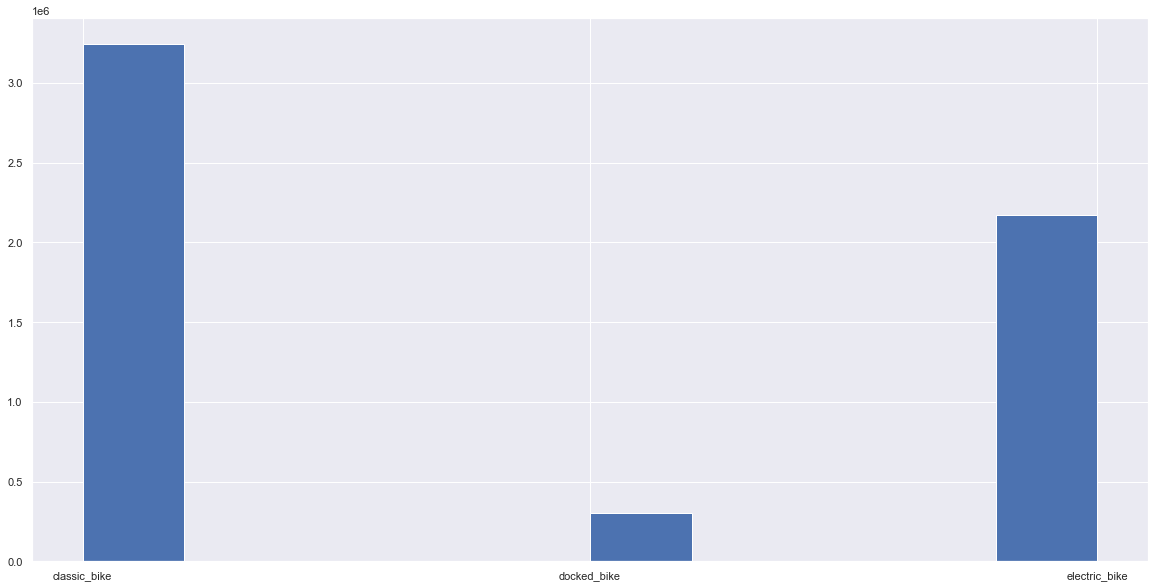

In [36]:
# histgram to visualize the 'rideable_type' and the trips used by each type of bike.
# Bike_type: Classic : Electric bikes: docked_bike= 56:38:6
df['rideable_type'].hist(figsize=(20,10),bins=10)  

Summary: 

1. All the docked_bike users are casual riders.  
2. Trips by Classic: Electric bikes: docked_bike = 56:38:6. Classic bike and electric_bike rental takes up to 94%. 

# Recommendation 1: 
    
Provide more marketing campaign visibility (footage, frequency) at docked_bike stations. The users are 100% targeted customers. 

Next step: explore the pattern of the start and end station 

In [37]:
# identify the most popular stations 
df.groupby('start_station_id')['start_station_id'].count().sort_values(ascending=False).head(10)

start_station_id
_MISSING_       745344
13022            83887
LF-005           47717
13300            45523
13042            44219
TA1308000050     44002
13008            42193
TA1307000039     41184
KA1504000135     37844
TA1308000001     36382
Name: start_station_id, dtype: int64

In [38]:
df.groupby('end_station_id')['end_station_id'].count().sort_values(ascending=False).head(10)

end_station_id
_MISSING_       791496
13022            84677
LF-005           53816
13042            44624
TA1308000050     44121
13300            43774
13008            42882
TA1307000039     40466
KA1504000135     37489
TA1308000001     36521
Name: end_station_id, dtype: int64

From the analysis, the most used start and end stations perfectly overlap. The top 7 stations are: 13022, LF-005,13042, 13000,TA1308000050, 13008, TA1308000050. 

# Recommendation 2:
From the location perspective: marketing campaign can prioritize the most popular 7 locations, where the campaign will target more users, and more targeted customers.

The 7 stations are: 13022, LF-005,13042, 13000,TA1308000050, 13008, TA1308000050, TA1307000039, KA1504000135, TA1308000001.

Next step: explore the trend of bike rental pattern by month/ season  

member_casual
casual    AxesSubplot(0.125,0.125;0.775x0.755)
member    AxesSubplot(0.125,0.125;0.775x0.755)
Name: started_at, dtype: object

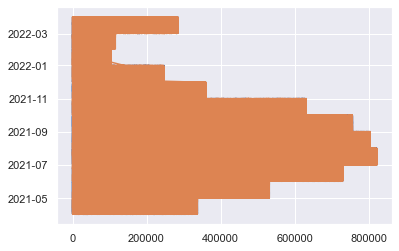

In [39]:
# the demand starts to increase from Jun to Oct. Lowest is in Jan & Feb.
df.groupby(['member_casual'])['started_at'].plot()

# Recommendation 3:

From the time perspective, Jun-Oct, are the peak season. I recommend to increase budget spent in these months. The marketing campaingn will be viewed by more more target customers.   

Next step:  explore the membership distribution and behavior difference 

In [40]:
# categorical data in seaborn
import seaborn as sns

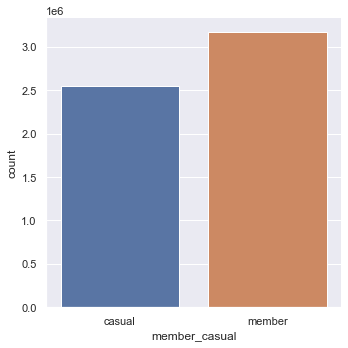

In [41]:
sns.catplot(data=df, x='member_casual',kind='count',aspect=1)

In [42]:
# count all the categorical columns 
cat_cols= df.select_dtypes(include=['category']).columns
cat_cols

Index(['rideable_type', 'member_casual'], dtype='object')

In [43]:
#  Member trip: Casual trip = 1.25:1
for i in cat_cols:
    print(df[col].value_counts())
    print()

member    3175616
casual    2542482
Name: member_casual, dtype: int64

member    3175616
casual    2542482
Name: member_casual, dtype: int64



<AxesSubplot:ylabel='trip_dur'>

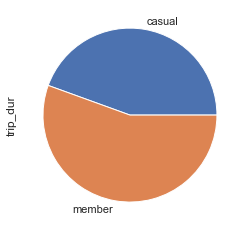

In [44]:
# casual & members ratio shows in pie chart 
df.groupby(['member_casual'])['trip_dur'].count().plot.pie()

The rentals by members users are slightly higher than casual users.  

## user behaviour - day , Member V. Casual 

In [45]:
df['day_name']= df['started_at'].dt.day_name()
df

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8112\3333220642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_name']= df['started_at'].dt.day_name()


,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_dur,day_name
0,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,TA1307000061,13235,41.897448,-87.628722,41.948150,-87.663940,member,0.021748,Monday
1,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,KA1503000069,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,0.044653,Tuesday
2,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,20121,20121,41.741487,-87.658410,41.741487,-87.658410,casual,3.956701,Saturday
3,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,TA1305000034,13235,41.903119,-87.673935,41.948150,-87.663940,member,0.017431,Saturday
4,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,20121,20121,41.741487,-87.658410,41.741487,-87.658410,casual,0.063391,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
284037,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,13042,13022,41.900960,-87.623777,41.892278,-87.612043,casual,0.005891,Sunday
284038,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,13137,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual,0.032083,Wednesday
284039,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,_MISSING_,15621,41.940000,-87.710000,41.961041,-87.705866,member,0.009352,Wednesday
284040,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,_MISSING_,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member,0.003935,Monday


In [46]:
df.day_name.values

array(['Monday', 'Tuesday', 'Saturday', ..., 'Wednesday', 'Monday',
       'Thursday'], dtype=object)

In [47]:
q= df.groupby('day_name')['trip_dur'].mean()
q

day_name
Friday       0.013697
Monday       0.013502
Saturday     0.016989
Sunday       0.018065
Thursday     0.012150
Tuesday      0.011970
Wednesday    0.012073
Name: trip_dur, dtype: float64

<AxesSubplot:xlabel='day_name'>

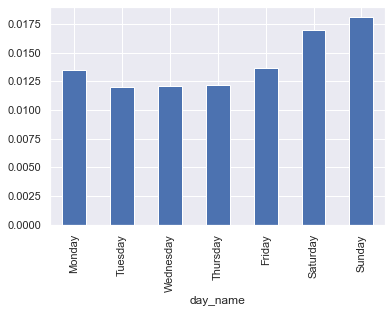

In [48]:
# the general trend of the trip duration: Sat & Sun have the longer trip duration
q[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot.bar()

<AxesSubplot:xlabel='day_name'>

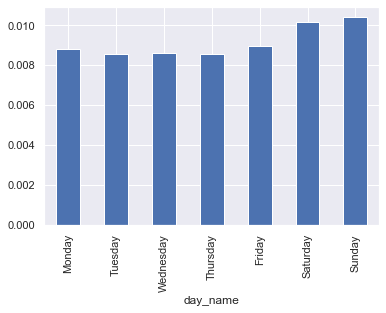

In [49]:
# member's rental trip duration- trip duration for the weekend is slightly longer than working days 
m_trip_dur= df.loc[df['member_casual']=='member'].groupby('day_name')['trip_dur'].mean()
m_trip_dur[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot.bar()

<AxesSubplot:xlabel='day_name'>

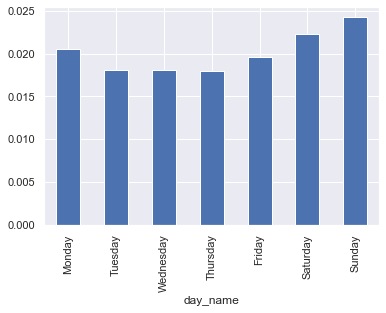

In [50]:
# casual riders' rental trip duration - trip duration are longer from Friday to Sunday.  
# The longer duration lasts till Monday, Tuesday drops back to again.  
# The trip duration in general is longer than the members' trip duration.   
c_trip_dur= df.loc[df['member_casual']=='casual'].groupby('day_name')['trip_dur'].mean()
c_trip_dur[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot.bar()

In [51]:
# Mon_Sun average trip_dur comparision between casual v. member. 
df.groupby('member_casual')[['trip_dur']].mean()

,trip_dur
member_casual,
casual,0.020645
member,0.009108


Summary: 

1. All the users have a similar trend in trip duration: The duration is longer at the weekend. Tuesday- Thursday are the shortest. 

2. Casual riders' average trip duration is around 2 times of the member's. 

<AxesSubplot:xlabel='day_name'>

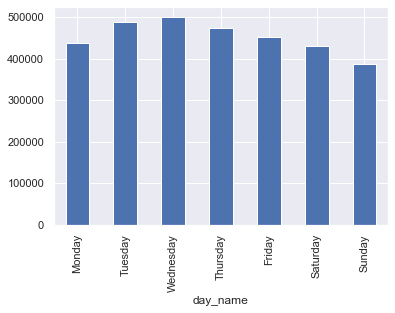

In [52]:
# member's rental trips number - Sunday has the lowest trips  
m_trip_count= df.loc[df['member_casual']=='member'].groupby('day_name')['trip_dur'].count()
m_trip_count[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot.bar()

<AxesSubplot:xlabel='day_name'>

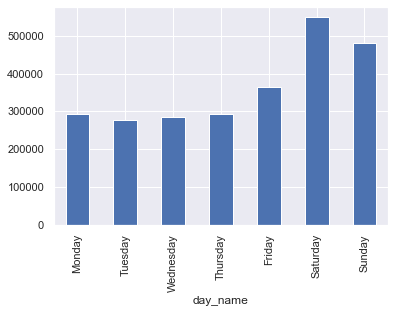

In [53]:
# casual's rental trip number - trip number increases peaks on Sat and Sun. Monday - Thurday are significantly lower.b  
c_trip_count= df.loc[df['member_casual']=='casual'].groupby('day_name')['trip_dur'].count()
c_trip_count[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot.bar()

Summary: 

The casual riders and members' demand ranges differently in days. Casuals riders' demand at the weekend are significantly higher than working days, while members have less demand at the weekend. 

# Recommendation 4: 
The analysis shows that casual users are more active (by 40% roughly) at the weekend.
Increasing the marketing campaingn at the weekend, can increase the campaign exporsure to casual users to increase the potential converation rate to memebers. 

Put the trip duration for both member and casual users together for analysis, use seaborn to visualize it.

In [54]:
# Mon_Sun trip_count comparision casual v. member
df2_trip_count=df[['day_name','trip_dur','member_casual']]
df2_trip_count

,day_name,trip_dur,member_casual
0,Monday,0.021748,member
1,Tuesday,0.044653,casual
2,Saturday,3.956701,casual
3,Saturday,0.017431,member
4,Saturday,0.063391,casual
...,...,...,...
284037,Sunday,0.005891,casual
284038,Wednesday,0.032083,casual
284039,Wednesday,0.009352,member
284040,Monday,0.003935,member


In [55]:
def day_sort(series):

    return series.apply(lambda x: {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}[x])

In [56]:
df2_trip_count_sort= df2_trip_count.sort_values(by='day_name', key=day_sort).set_index('day_name').reset_index
df2_trip_count_sort

<bound method DataFrame.reset_index of           trip_dur member_casual
day_name                        
Monday    0.021748        member
Monday    0.004491        casual
Monday    0.005255        member
Monday    0.014838        member
Monday    0.032269        casual
...            ...           ...
Sunday    0.011042        member
Sunday    0.007199        casual
Sunday    0.006574        casual
Sunday    0.024491        casual
Sunday    0.026435        casual

[5718098 rows x 2 columns]>

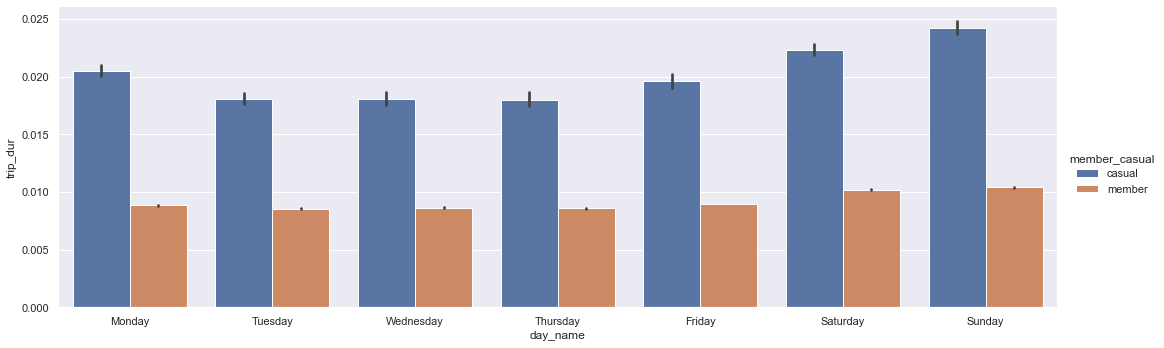

In [57]:
df2=df[['day_name','trip_dur','member_casual']]
df2_sort= df2.sort_values(by='day_name',key=lambda x: x.map({'Monday':1,'Tuesday':2,'Wednesday':3,
                                                             'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}))
sns.catplot(data=df2_sort, x='day_name', y='trip_dur', kind='bar', hue='member_casual',aspect=3)

Seaborn provides a clear visual: 

The trip duration trend for members are consistenet with slight increase for the weekend. For casuals, duration is higher for the weekend.

In [58]:
df2_sort

,day_name,trip_dur,member_casual
0,Monday,0.021748,member
218074,Monday,0.004491,casual
40151,Monday,0.005255,member
22013,Monday,0.014838,member
40155,Monday,0.032269,casual
...,...,...,...
489347,Sunday,0.011042,member
489350,Sunday,0.007199,casual
73606,Sunday,0.006574,casual
298266,Sunday,0.024491,casual


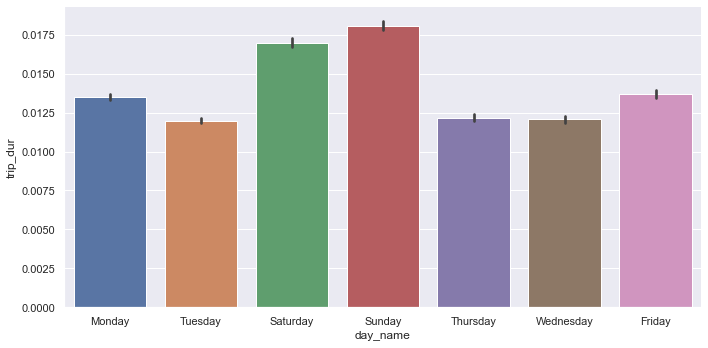

In [59]:
df2.sort_index(key=lambda x: x.map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}))
sns.catplot(data=df2, x='day_name', y='trip_dur', kind='bar',aspect=2)

In [60]:
df_day_name_trip_count=df[['day_name','trip_dur']]
df_day_name_trip_count

,day_name,trip_dur
0,Monday,0.021748
1,Tuesday,0.044653
2,Saturday,3.956701
3,Saturday,0.017431
4,Saturday,0.063391
...,...,...
284037,Sunday,0.005891
284038,Wednesday,0.032083
284039,Wednesday,0.009352
284040,Monday,0.003935


<AxesSubplot:xlabel='day_name'>

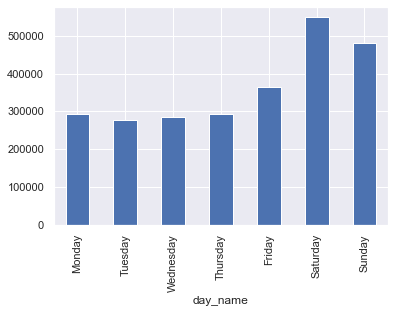

In [61]:
# casual's rental trip number - day of the week trend
m= df.loc[df['member_casual']=='casual'].groupby('day_name')['trip_dur'].count()
m[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot.bar()

Use key & lambda to arrange the plot by day of the week

In [62]:
df.sort_values(by=['day_name'], key=lambda x: x.map({'Monday':'1','Tuesday':'2','Wednesday':'3','Thursday':'4','Friday':'5','Saturday':'6','Sunday':'7'}))

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_dur,day_name
0,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,TA1307000061,13235,41.897448,-87.628722,41.948150,-87.663940,member,0.021748,Monday
218074,classic_bike,2021-11-01 17:23:11,2021-11-01 17:29:39,KA1504000162,KA1504000175,42.009011,-87.674112,42.007972,-87.665502,casual,0.004491,Monday
40151,classic_bike,2021-09-13 06:23:10,2021-09-13 06:30:44,13158,KA1503000043,41.877642,-87.649618,41.889177,-87.638506,member,0.005255,Monday
22013,classic_bike,2021-06-14 17:47:23,2021-06-14 18:08:45,13016,TA1307000041,41.894345,-87.622798,41.936688,-87.636829,member,0.014838,Monday
40155,electric_bike,2021-09-06 17:40:31,2021-09-06 18:26:59,TA1308000047,_MISSING_,41.957111,-87.664213,41.930000,-87.710000,casual,0.032269,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
489347,classic_bike,2021-07-18 02:02:03,2021-07-18 02:17:57,TA1308000019,KA1504000143,41.939743,-87.658865,41.946655,-87.683359,member,0.011042,Sunday
489350,classic_bike,2021-07-18 10:42:25,2021-07-18 10:52:47,KA1504000076,KA1503000046,41.794301,-87.601450,41.780406,-87.591416,casual,0.007199,Sunday
73606,classic_bike,2021-10-03 18:48:52,2021-10-03 18:58:20,13431,SL-005,41.866095,-87.607267,41.867888,-87.623041,casual,0.006574,Sunday
298266,classic_bike,2021-06-13 17:59:28,2021-06-13 18:34:44,13045,13276,41.893992,-87.629318,41.931320,-87.638742,casual,0.024491,Sunday


<AxesSubplot:xlabel='day_name'>

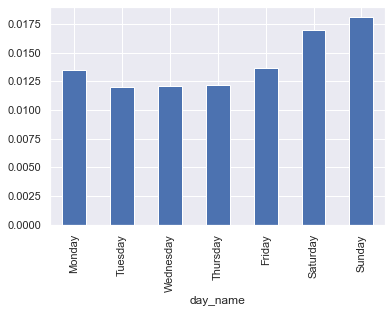

In [63]:
# sort_values/ Index,series no need to select the column, it is only one column
df.groupby('day_name')['trip_dur'].mean().sort_index(key=lambda x: x.map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})).plot.bar()

<AxesSubplot:xlabel='day_name'>

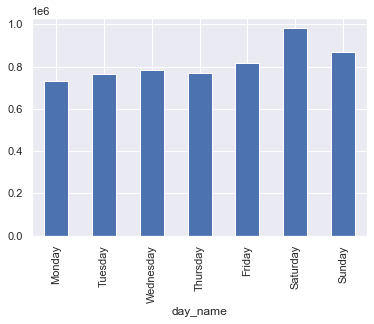

In [64]:
# total trip # by 'day_name'. Sort_values (used for df) v. sort_index(used for seriers) 
df.groupby('day_name')['trip_dur'].count().sort_index(key=lambda x: x.map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})).plot.bar()

The three key recommendations for the marketing campaign: 

1. From the location perspective: 
The marketing campaign(i.e. rolling ads on the stations) can prioritize the most popular 7 locations, where the campaign will target more users, and more targeted customers.

2. From the target customers perspective: 
Provide more marketing campaign visibility (i.e. billboard footage, rolling ads frequency) at docked bike stations. The users are 100% targeted customers.
Digital advertisement and email campaign can be used to this group of users too. 

3. From the time perspective:
  
    a. Jun-Oct are the peak seasons. I recommend to increase budget spent in these months. The marketing campaingn will be viewed by more targeted customers (casual users). Digital advertisement and email campaign frequency can be increased.
  
    b. The casual users are more active (by 40% roughly) at the weekend. Increasing the marketing campaingn at the weekend, can increase the campaign exporsure to casual riders to increase the potential convertion rate from casual riders to annual memebers.

Findings: 

1. Both types of users have a similar trend in trip duration: The duration is longer at the weekend. Tuesday- Thursday are the shortest. 
2. Casual riders' average trip duration is around 2 times of the member's. 
3. Members do not rent bikes for over 1.5 days. The long duration trips are by casual riders.
4. Usages throughout the week differs between casual rider and members. Casuals riders' usage at the weekend are significantly higher than working days, while members have less demand at the weekend. 
5. All the docked_bike users are casual riders.
6. Casual users are more active (by 40% roughly) at the weekend.
7. The most used start and end stations perfectly overlap. The top 7 stations are: 13022, LF-005,13042, 13000,TA1308000050, 13008, TA1308000050.  